IMPORTING LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

#display all columns and rows of the dataframe
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', 150)

LOADING THE DATA

In [3]:
from google.colab import files
raw=files.upload()

Saving titanic.csv to titanic.csv


REVIEWING THE DATASET

In [4]:
rdata=pd.read_csv('titanic.csv')

In [36]:
ndata=rdata.copy()
ndata

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Survived ---> This is basically our target.(We've to train our model on the basis of this data.)

PClass ---> Ticket Class (1=Luxurious Class , 2=Modest Class, 3=Steerage Class(Basic))

Fare ---> Passenger fare

Cabin ---> Cabin Number

Emarked ---> From where the people started their voyage (C=Cherbourg, S= Southampton, Q=Queenstown)

sibsp: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them


In [37]:
df=ndata.copy()

In [38]:
print("Column Names:", df.columns)

Column Names: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


EXPLORATORY DATA ANALYSIS

In [39]:
df.shape

(891, 12)

In [40]:
df.head()# Display the first few rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [42]:
df.tail()# Display the last few rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [43]:
# Display data types of columns in the DataFrame
print(df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [44]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [45]:
# Display summary for categorical data
print(df.describe(include='object').T)

         count unique                      top freq
Name       891    891  Braund, Mr. Owen Harris    1
Sex        891      2                     male  577
Ticket     891    681                   347082    7
Cabin      204    147                  B96 B98    4
Embarked   889      3                        S  644


In [51]:
print (df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean())

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


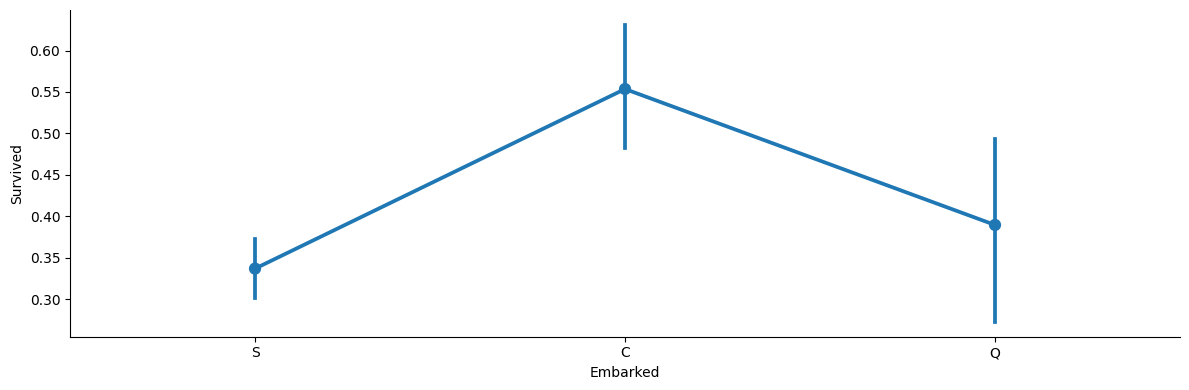

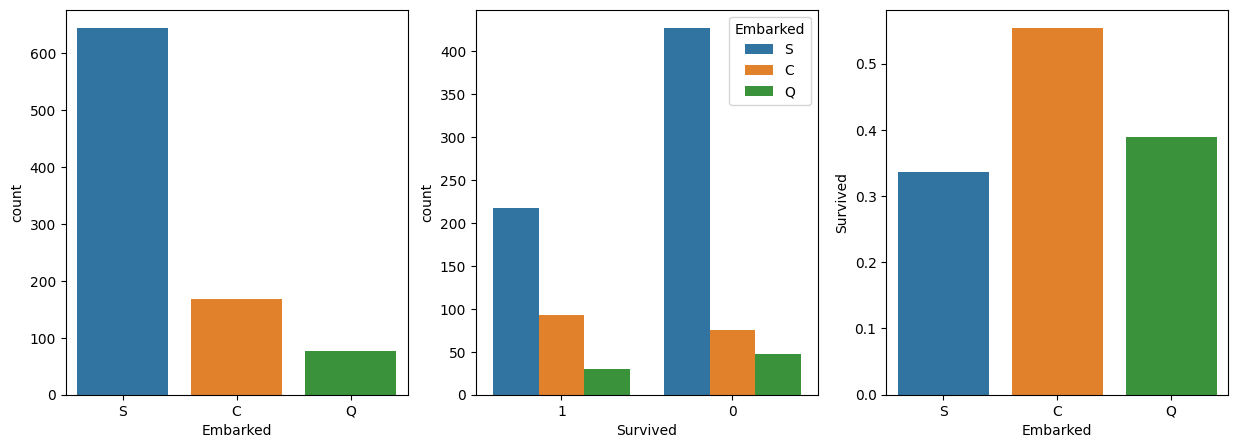

In [71]:
# Using catplot
sb.catplot(x='Embarked', y='Survived', data=df, kind='point', height=4, aspect=3)
#Seaborn's catplot function to create a categorical plot.
#It's specifying that the x-axis should represent the 'Embarked' column,
#the y-axis should represent the 'Survived' column, and the data for the plot is coming from the DataFrame df.
#The kind='point' argument specifies that a point plot should be created.
#The height=4 and aspect=3 parameters control the size and aspect ratio of the plot

fig, (axis1, axis2, axis3) = plt.subplots(1, 3, figsize=(15, 5))
#The subplots function is used to create a 1x3 grid of subplots, and the individual subplots are assigned to axis1, axis2, and axis3.

# Count plot for Embarked
sb.countplot(x='Embarked', data=df, ax=axis1)
#This line creates a count plot (bar plot showing counts of unique values) for the 'Embarked' column on the first subplot (axis1).

# Count plot for Survived with hue='Embarked'
sb.countplot(x='Survived', hue='Embarked', data=df, order=[1, 0], ax=axis2)  #This section calculates the mean survival rate for each 'Embarked' value and
                                                                               #stores it in the embark_perc DataFrame.
#Then, it creates a bar plot of these mean survival rates on the third subplot (axis3), specifying the order of the bars as ['S', 'C', 'Q'].

# Bar plot for the mean of Survived passengers for each value in Embarked
embark_perc = df[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean()     #This section calculates the mean survival rate for each 'Embarked' value and
                                                                                                 #stores it in the embark_perc DataFrame.

#Then, it creates a bar plot of these mean survival rates on the third subplot (axis3), specifying the order of the bars as ['S', 'C', 'Q'].

sb.barplot(x='Embarked', y='Survived', data=embark_perc, order=['S', 'C', 'Q'], ax=axis3)

plt.show()


<Axes: xlabel='Pclass', ylabel='count'>

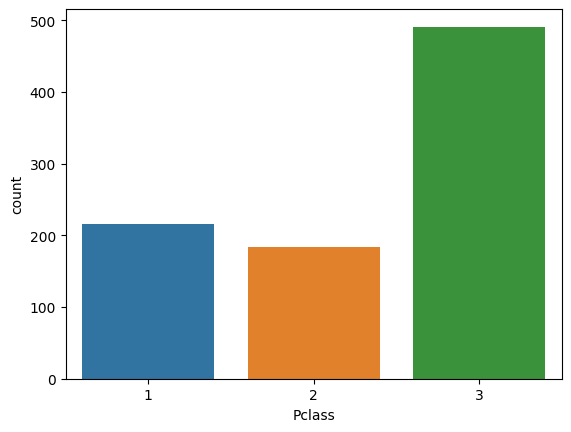

In [63]:

sb.countplot(x='Pclass', data=df)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87]),
 [Text(0, 0, '0.42'),
  Text(1, 0, '0.67'),
  Text(2, 0, '0.75'),
  Text(3, 0, '0.83'),
  Text(4, 0, '0.92'),
  Text(5, 0, '1.0'),
  Text(6, 0, '2.0'),
  Text(7, 0, '3.0'),
  Text(8, 0, '4.0'),
  Text(9, 0, '5.0'),
  Text(10, 0, '6.0'),
  Text(11, 0, '7.0'),
  Text(12, 0, '8.0'),
  Text(13, 0, '9.0'),
  Text(14, 0, '10.0'),
  Text(15, 0, '11.0'),
  Text(16, 0, '12.0'),
  Text(17, 0, '13.0'),
  Text(18, 0, '14.0'),
  Text(19, 0, '14.5'),
  Text(20, 0, '15.0'),
  Text(21, 0, '16.0'),
  Text(22, 0, '17.0'),
  Text(23, 0, '18.0'),
  Text(24, 0, '19.0'),
  Text(25, 0, '20.0'),
  Text(26, 0, '20.5

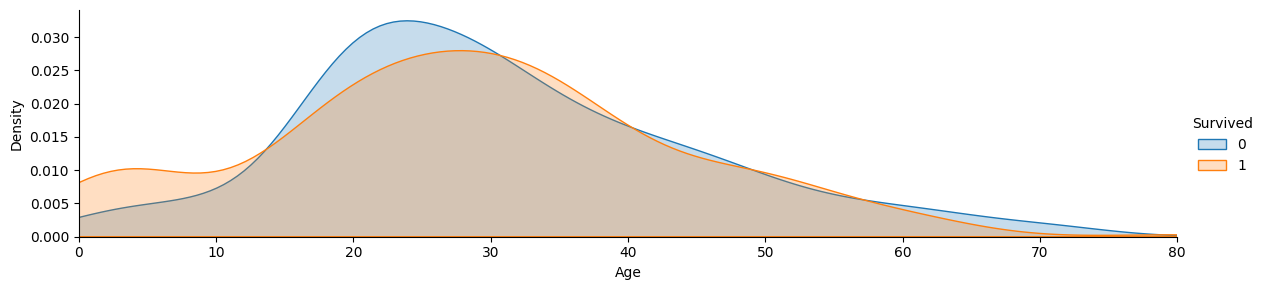

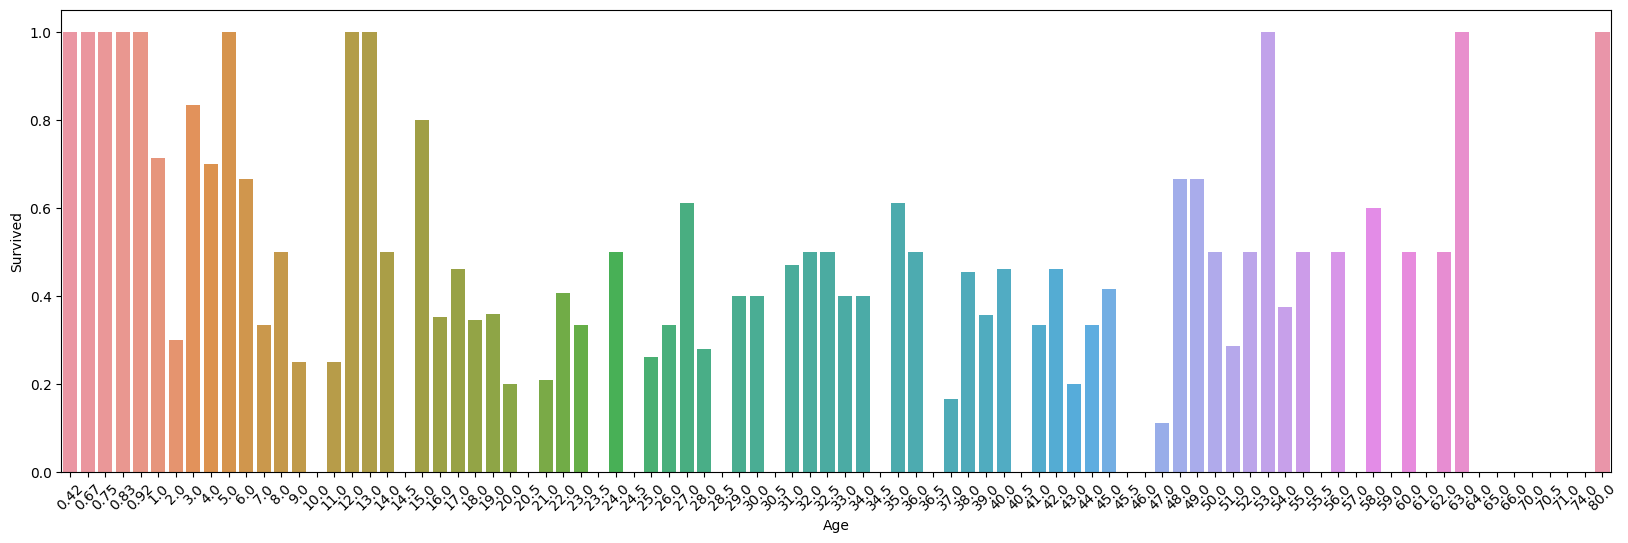

In [75]:
facet = sb.FacetGrid(df, hue="Survived", aspect=4)
facet.map(sb.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()
fig, axis1 = plt.subplots(1, 1, figsize=(20, 6))
average_age = df[["Age", "Survived"]].groupby(['Age'], as_index=False).mean()
sb.barplot(x='Age', y='Survived', data=average_age)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability


Creates a new column 'Family' indicating whether a passenger had any family member aboard (1 if yes, 0 if no).

Drops the 'Parch' and 'SibSp' columns as they are no longer needed.

Plots two subplots:

The first subplot (axis1) is a count plot showing the distribution of passengers with and without family.

The second subplot (axis2) is a bar plot showing the average survival rate for passengers with and without family.

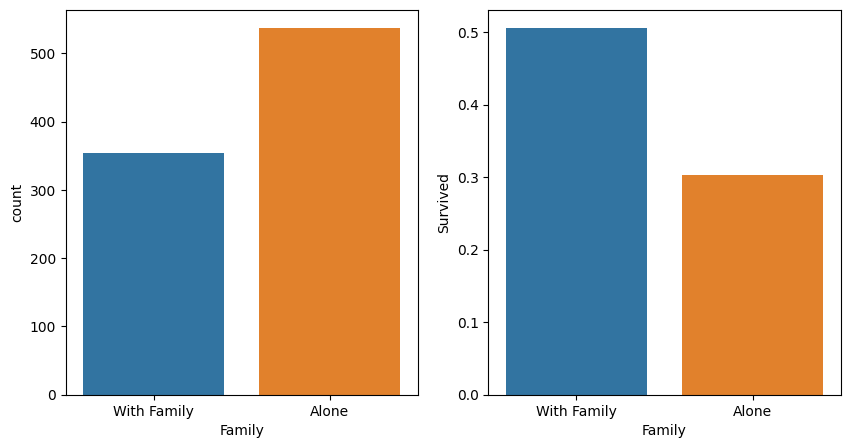

In [76]:
# Family
# Create a 'Family' column by checking if a passenger has any family members (Parch + SibSp > 0)
df['Family'] = (df["Parch"] + df["SibSp"] > 0).astype(int)

# Drop Parch & SibSp columns
df = df.drop(['SibSp', 'Parch'], axis=1)

# Plot
# Create a subplot with 1 row and 2 columns
fig, (axis1, axis2) = plt.subplots(1, 2, sharex=True, figsize=(10, 5))

# Countplot showing the number of passengers with and without family
sb.countplot(x='Family', data=df, order=[1, 0], ax=axis1)

# Barplot showing the average survival rate for passengers with and without family
family_perc = df[["Family", "Survived"]].groupby(['Family'], as_index=False).mean()
sb.barplot(x='Family', y='Survived', data=family_perc, order=[1, 0], ax=axis2)

# Set x-axis labels for the first plot
axis1.set_xticklabels(["With Family", "Alone"], rotation=0)

# Show the plots
plt.show()

In [77]:
# Create a 'Family' column indicating whether a passenger had any family member aboard
ndata['Family'] = (df['Parch'] + df['SibSp'] > 0).astype(int)


# Drop 'Parch' and 'SibSp' columns
df = df.drop(['Parch', 'SibSp'], axis=1)


# Create a stacked bar plot
family_survived = df.groupby(['Family', 'Survived']).size().unstack()
family_survived.columns = ['Not Survived', 'Survived']

# Plotting
family_survived.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(8, 5))
plt.xticks([0, 1], ["Alone", "With Family"], rotation=0)
plt.title("Survival Rate Based on Family Presence")
plt.xlabel("Family Presence")
plt.ylabel("Passenger Count")

plt.show()


KeyError: ignored

In [46]:
#display summary for numerical data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


DATACLEANING:

In [ ]:
df.isna().sum()

S.no          0
Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

<Axes: >

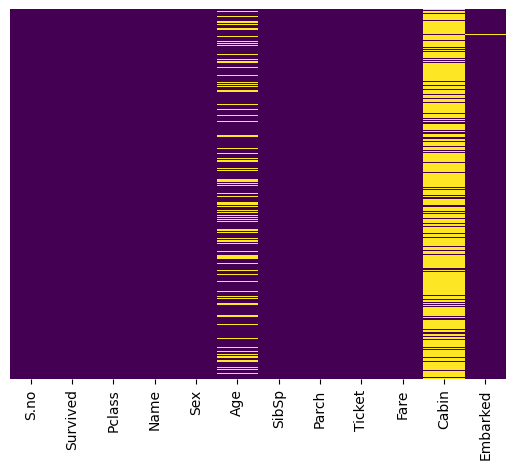

In [ ]:
sb.heatmap(df.isna(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
(df.isna().sum()*100/df.shape[0]).sort_values(ascending=True)

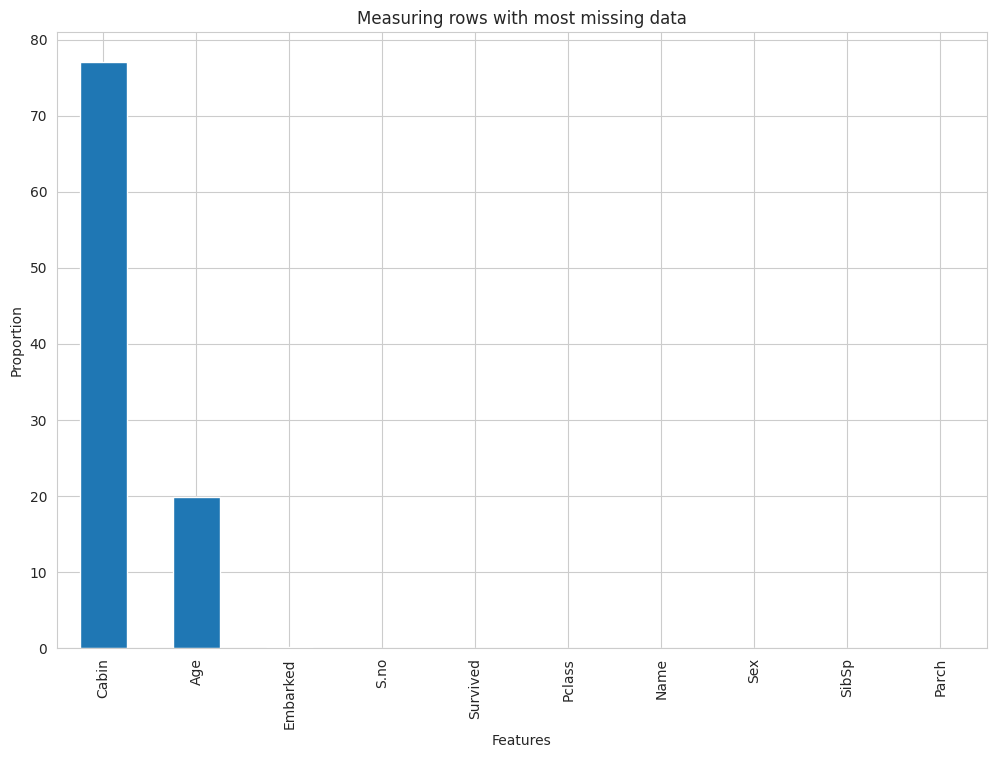

In [ ]:
sb.set_style('whitegrid')
plt.figure(figsize=(12,8))
miss_values=df.isna().sum()*100/df.shape[0]
miss_values=miss_values.sort_values(ascending=False)[0:10]
ax=miss_values.plot(kind='bar')
ax.set_title('Measuring rows with most missing data')
ax.set_ylabel('Proportion')
ax.set_xlabel('Features')
ax.tick_params(axis='x',rotation=90)



HANDLING MISSING VALUES

General Recommendations:


Always understand the nature of missing values before deciding on a strategy.


Consider the impact of missing data on your analysis and results.


Document any imputation or handling strategy for transparency.

In [ ]:
df['Cabin'].dtypes
# Impute missing values with the mode of the categorical column
df['Cabin'].fillna(df['Cabin'].mode()[0], inplace=True)


In [ ]:
df['Age'].fillna(df['Age'].mean(), inplace=True)  # numerical

In [ ]:
df.isna().sum()

S.no        0
Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    2
dtype: int64

<ipython-input-81-c31ab5b310f0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=df.corr()


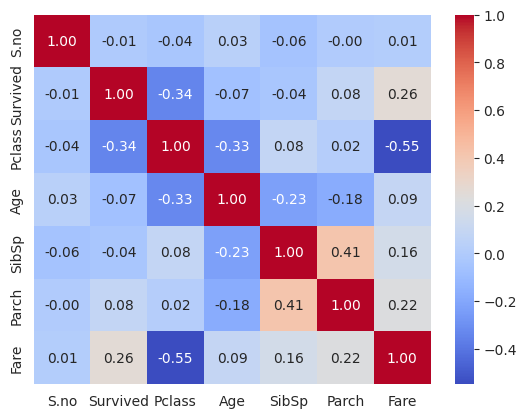

In [ ]:
correlation=df.corr()
sb.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [ ]:
print(correlation['Survived'].sort_values(ascending=False),'\n')

Survived    1.000000
Fare        0.257307
Parch       0.081629
S.no       -0.005007
SibSp      -0.035322
Age        -0.069809
Pclass     -0.338481
Name: Survived, dtype: float64 



In [ ]:
df.columns

Index(['S.no', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
# Drop multiple columns
columns_to_drop = ['S.no', 'Cabin']
df = df.drop(columns=columns_to_drop)


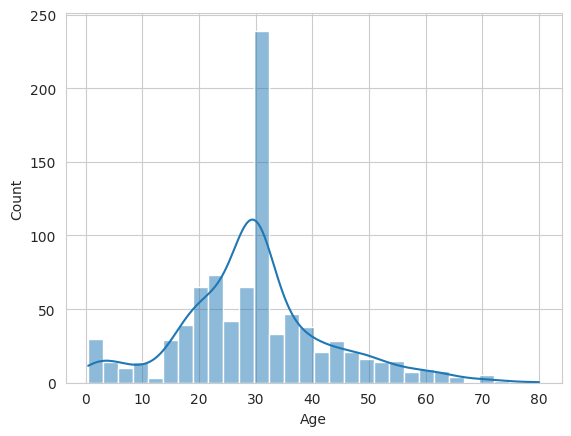

In [ ]:
# Visualize distribution of a numerical column
sb.histplot(df['Age'], kde=True)
plt.show()


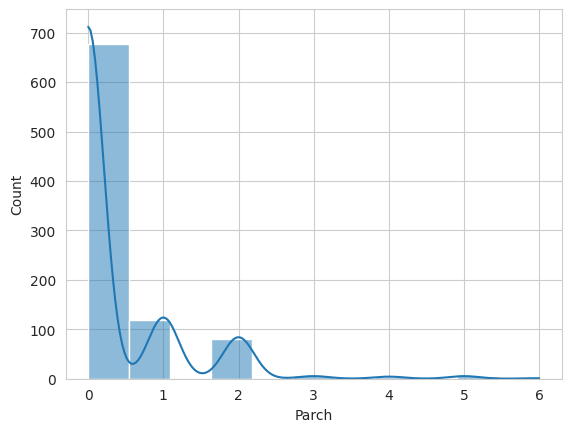

In [ ]:
# Visualize distribution of a numerical column
sb.histplot(df['Parch'], kde=True)
plt.show()


In [ ]:
df['Parch'].nunique()

7

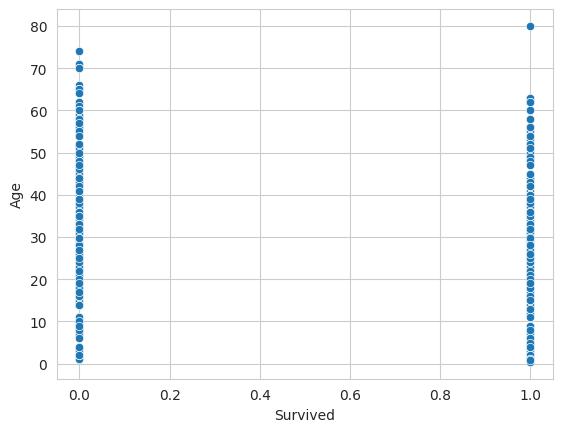

In [ ]:
# Scatter plot
sb.scatterplot(x='Survived', y='Age', data=df)
plt.show()

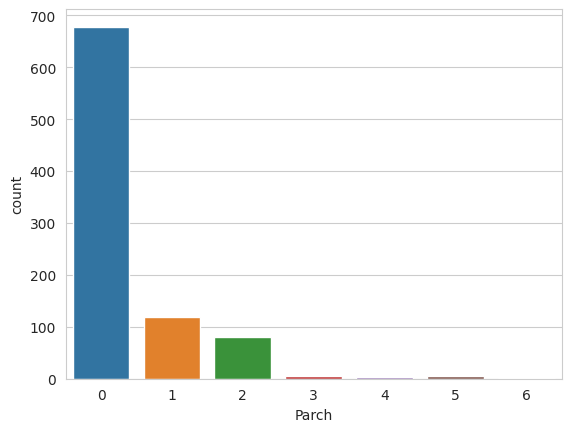

In [ ]:
# Count plot for a categorical variable
sb.countplot(x='Parch', data=df)
plt.show()


In [ ]:
# Cross-tabulation
pd.crosstab(df['Parch'], df['Pclass'])

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


ORDINAL ENCODING

In [ ]:
df.dtypes

Survived              int64
Pclass                int64
Name                 object
Sex                  object
Age                 float64
SibSp                 int64
Parch                 int64
Ticket               object
Fare                float64
Embarked             object
Survived_encoded      int64
Pclass_encoded        int64
Name_encoded          int64
Sex_encoded           int64
Age_encoded           int64
SibSp_encoded         int64
Parch_encoded         int64
Ticket_encoded        int64
Fare_encoded          int64
Embarked_encoded      int64
dtype: object